In [12]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np 
from pathlib import Path
from hypnose_analysis.utils.movement_analysis_utils import *
from hypnose_analysis.utils.visualization_utils import print_cache_keys
from ipywidgets import widgets
from IPython.display import display
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot movement traces for different modes - plot_trial_trace_by_mode quick guide

- Common args: subjid, dates (list [] or range ()), xlim, ylim, smooth_window (frames), linewidth, alpha, invert_y
- Modes: 
    - rewarded: rewarded trials only
    - rewarded_hr: rewarded trials; HR trials colored with HR palette
    - completed: all completed trials (rewarded, unrewarded, timeout)
    - all_trials: completed and aborted trials
    - fa_by_response: FA trials (selected by fa_types filter), sorted by response port
    - fa_by_odor: FA trials, sorted by each aborted odor
    - hr_only: hidden-rule trials, colored by associated reward port, with rewarded and unrewarded trials
- Options: 
    - show_average: adds mean trace + SEM per category
    - highlight_hr: in rewarded/all_trials mode, recolor HR trials in different palette
    - color_by_index: ignore categories; color each trace by normalized sample index
    - fa_types: filter FA labels (select between "FA_time_in", "FA_time_out", or both)

Loaded SLEAP tracking: 146922 frames from sub-040_ses-20251231_combined_sleap_tracking_timestamps.csv


[<Figure size 1000x600 with 2 Axes>,
 <Figure size 1000x600 with 2 Axes>,
 <Figure size 1000x600 with 2 Axes>]

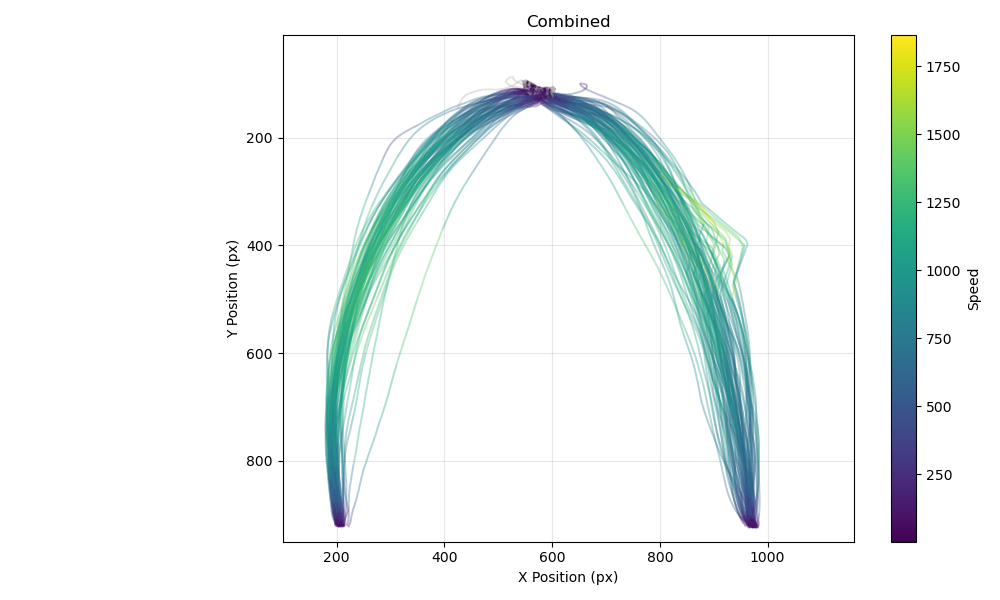

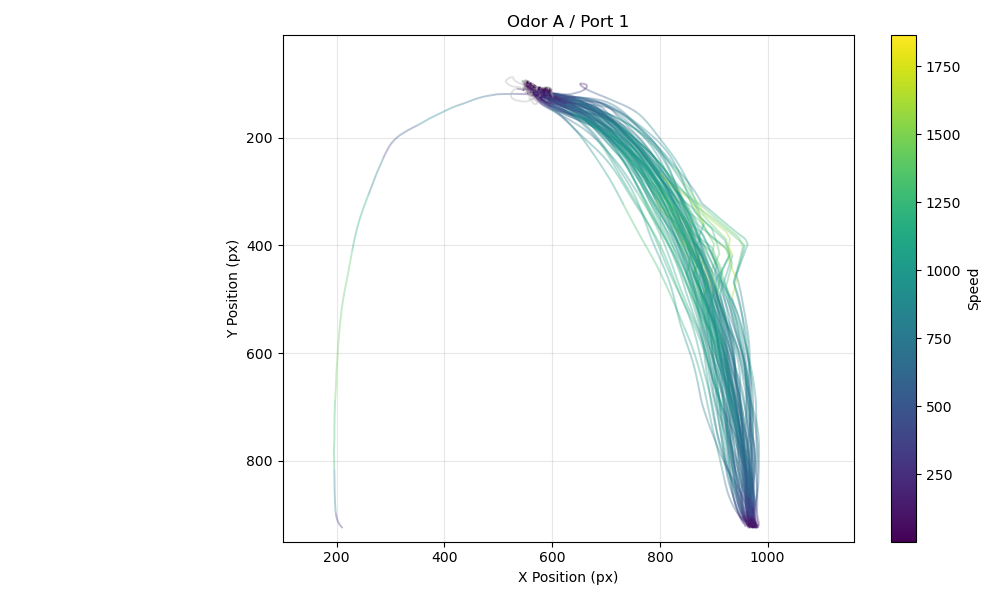

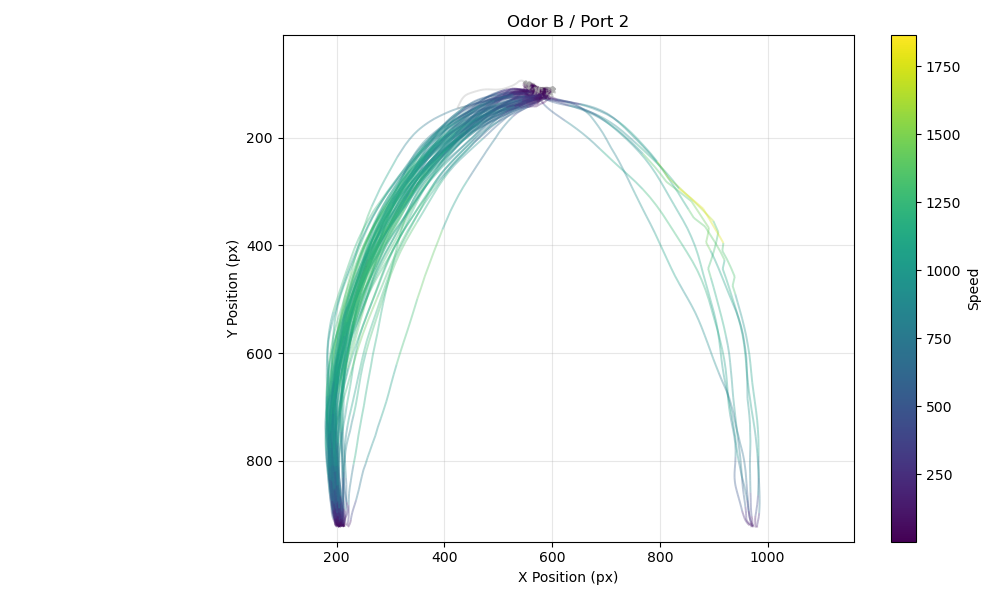

In [2]:
plot_trial_traces_by_mode(
    subjid=40,
    dates=[20251231],
    mode='completed',
    xlim=(100,1160),
    ylim=(10,950),
    show_average=False, 
    highlight_hr=True, 
    color_by_index=False,
    color_by_speed=True,
    fa_types=['FA_time_in'],
    figsize=(10,6)
)

# Modes: 
    # rewarded, rewarded_hr, completed, all_trials, fa_by_response, fa_by_odor, hr_only

# Speed Analysis

In [3]:
speed_analysis = run_speed_analysis_batch(
    subjids=[40],
    dates=[20251211],
    fa_label_filter=["fa_time_in", "fa_time_out"],
    threshold=True
)

[CACHE HIT] SLEAP session for subjid=40, date=20251211
[run_speed_analysis_batch] Completed speed analysis for:
  sub-040: 20251211


C:\Users\HarrisLab\Desktop\Repos\hypnose\hypnose-analysis\src\hypnose_analysis\utils\movement_analysis_utils.py:2268: RuntimeWarning: Mean of empty slice
  session_mean = np.nanmean(stack, axis=0)


C:\Users\HarrisLab\Desktop\Repos\hypnose\hypnose-analysis\src\hypnose_analysis\utils\movement_analysis_utils.py:84: RuntimeWarning: Mean of empty slice
  def _load_tracking_and_behavior(subjid, date, tracking_source='sleap'):
C:\Users\HarrisLab\Desktop\Repos\hypnose\hypnose-analysis\src\hypnose_analysis\utils\movement_analysis_utils.py:97: RuntimeWarning: Mean of empty slice
  


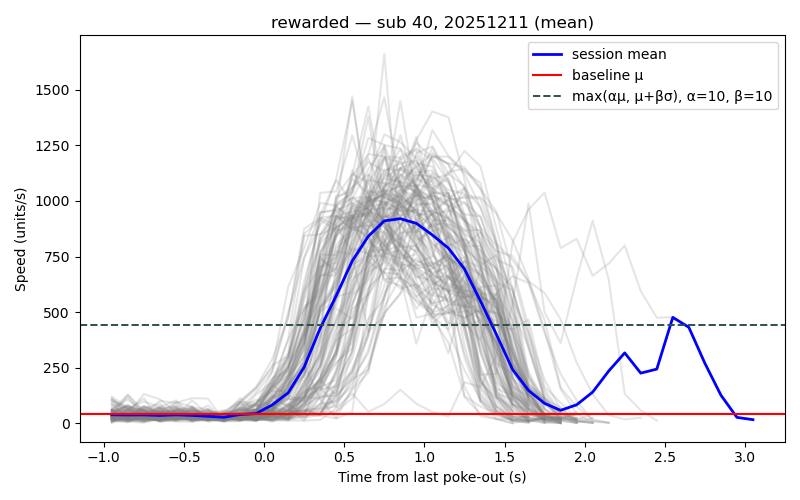

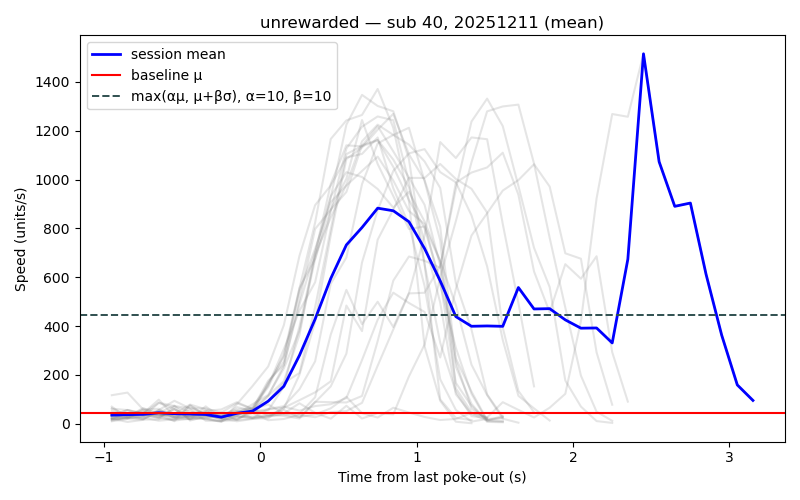

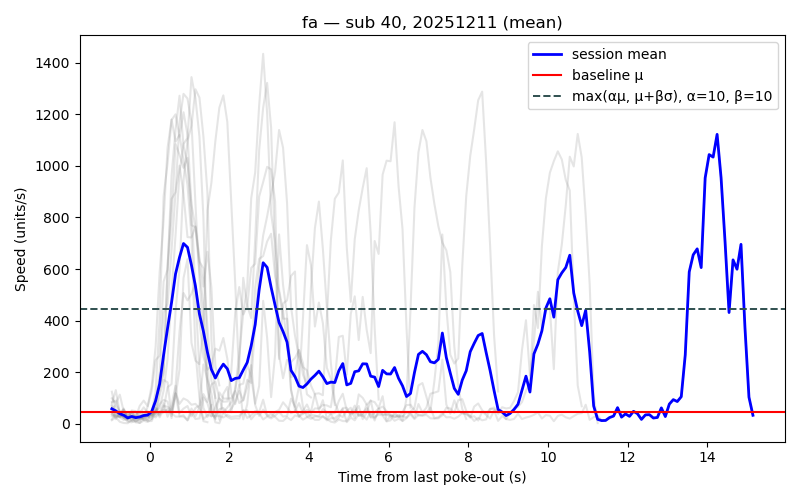

In [6]:
speed_analysis_plot = plot_epoch_speeds_by_condition(
    subjid=40,
    dates=[20251211],
    fa_label_filter=["fa_time_in", "fa_time_out"],
)


[CACHE HIT] SLEAP session for subjid=40, date=20251211


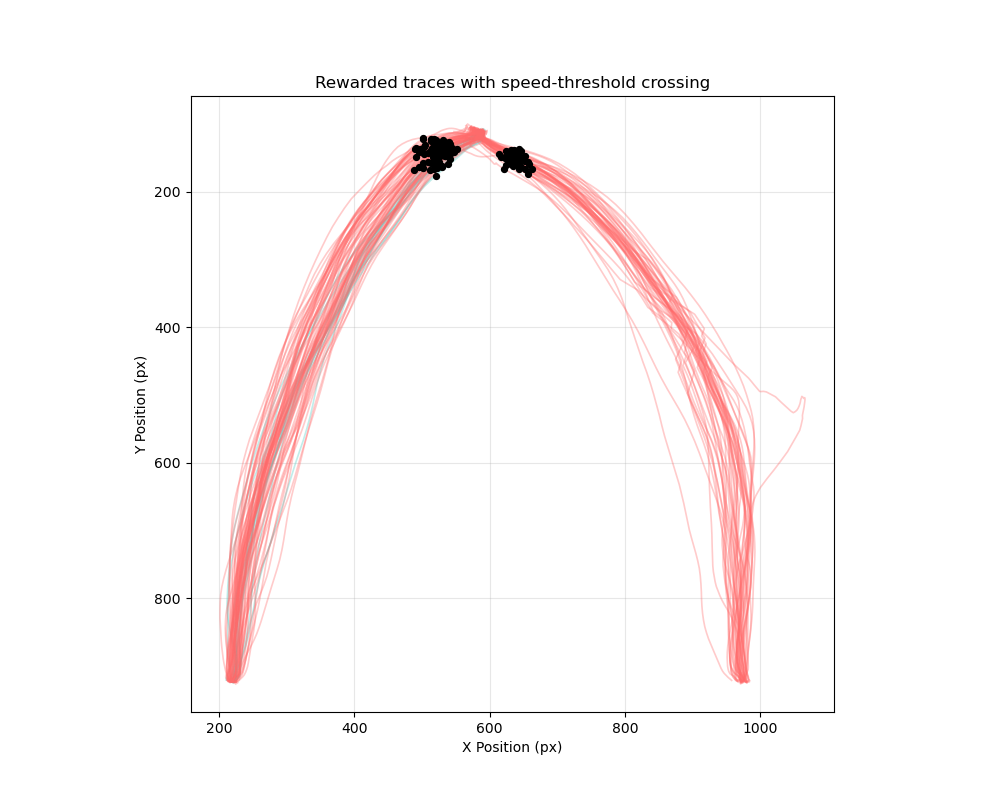

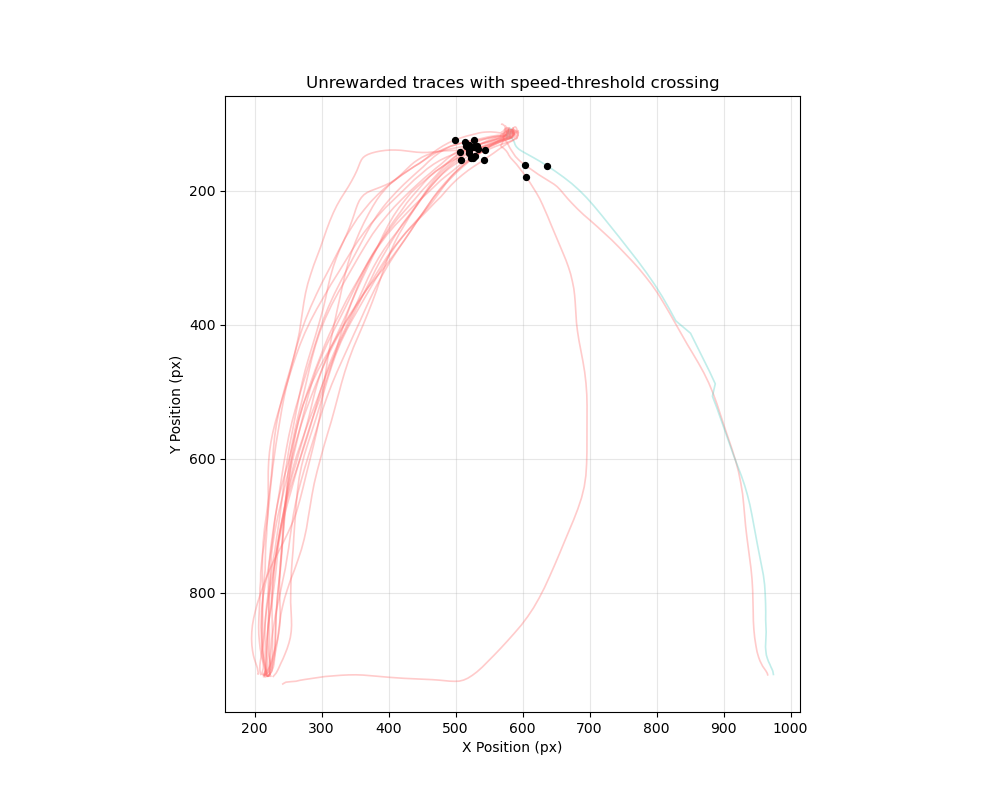

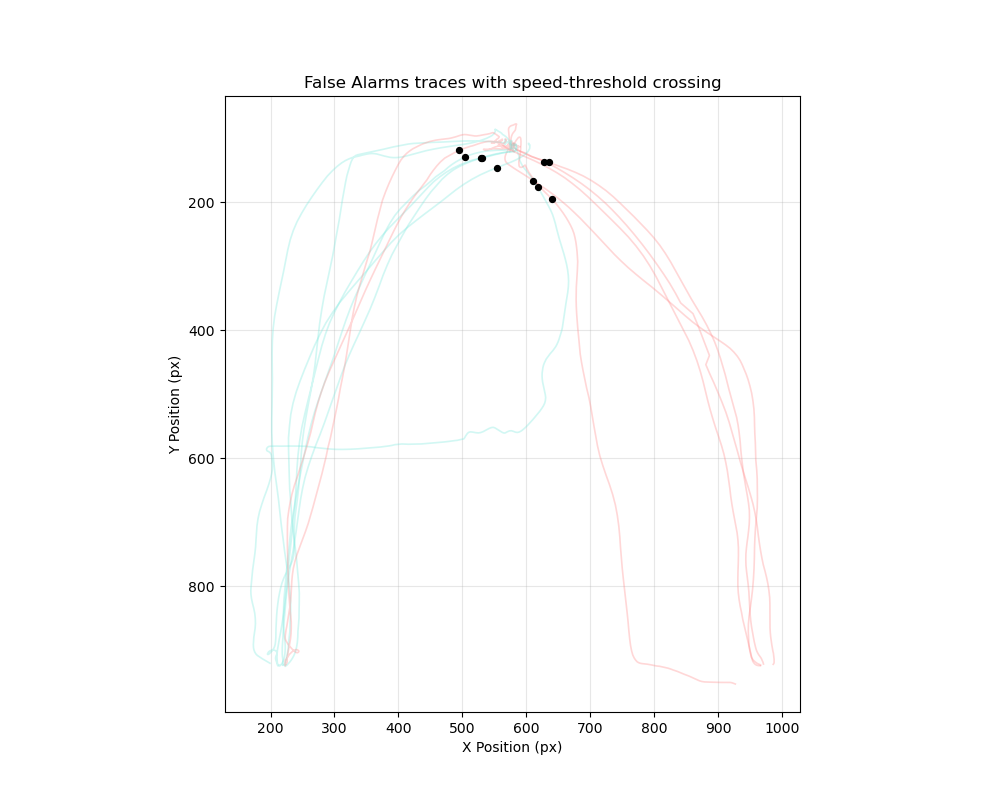

In [4]:
fig_thresh = plot_traces_with_speed_threshold(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    pre_buffer_s=0.5,
    threshold_alpha=10.0,
    threshold_beta=10.0,
    smooth_window=5,
    invert_y=True, 
)

[CACHE HIT] SLEAP session for subjid=40, date=20251211


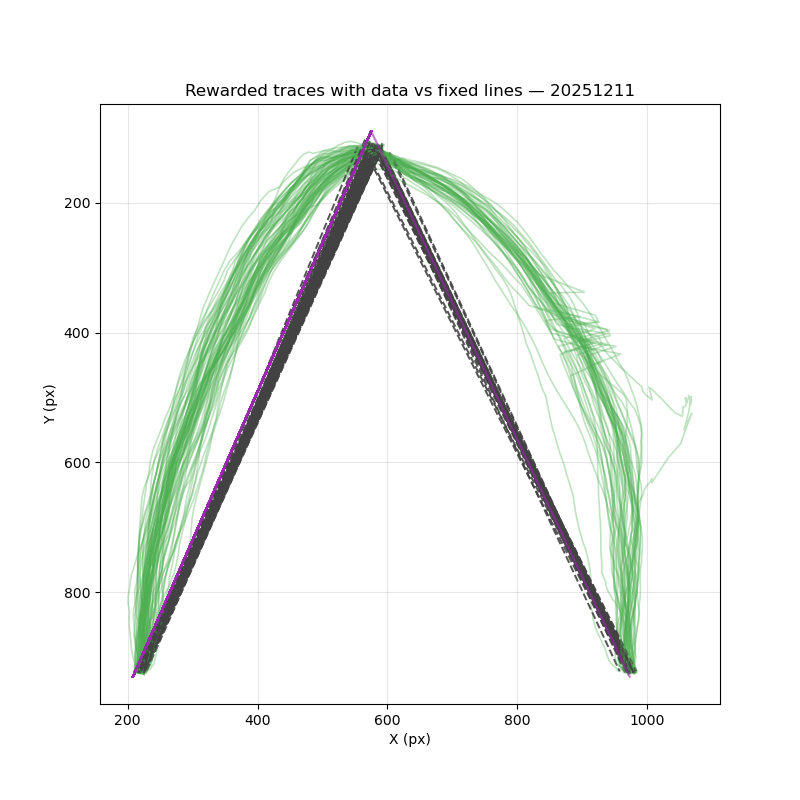

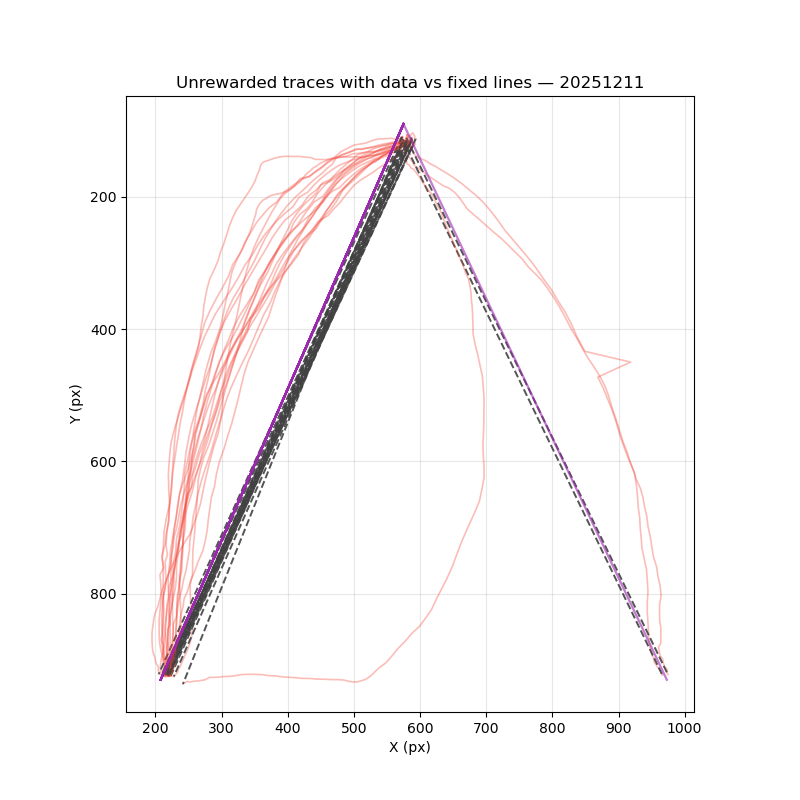

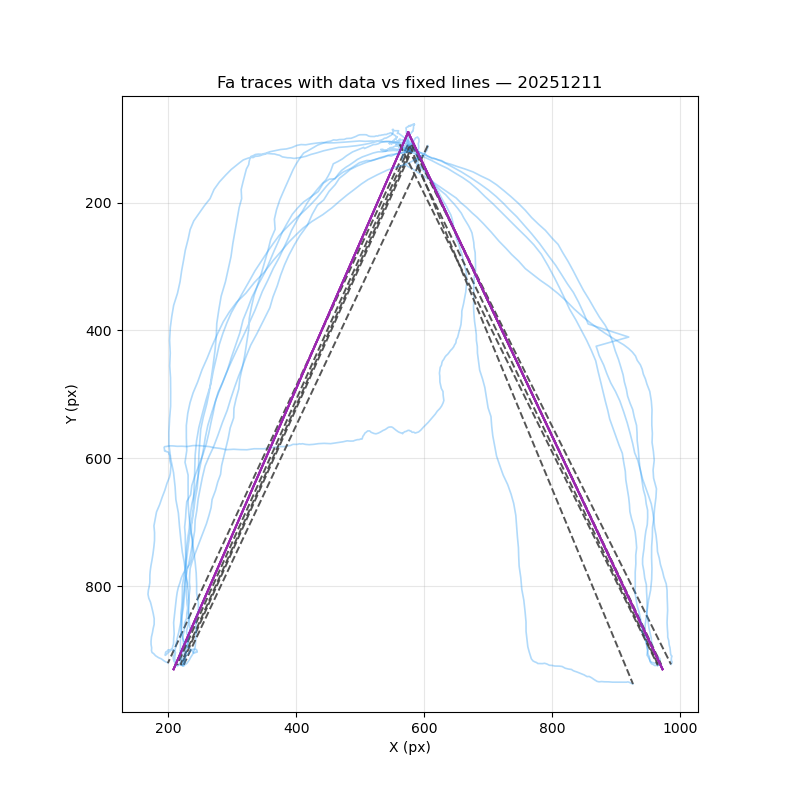

In [7]:
figs_overlay = plot_tortuosity_lines_overlay(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    bin_ms=100,
    fixed_start_xy=(575, 90),
    fixed_goal_a_xy=(208, 930),
    fixed_goal_b_xy=(973, 930),
)


STATISTICAL SUMMARY (Kruskal-Wallis + Pairwise Mann-Whitney U with Holm-Bonferroni correction)

latency_s: Kruskal-Wallis: p = 0.4358
      (not significant)

movement_from_valve_s: Kruskal-Wallis: p = 0.2972
      (not significant)

path_length_px: Kruskal-Wallis: p = 0.0009
      Rewarded vs Unrewarded: p = 0.4674 (corrected)
      Rewarded vs Fa: p = 0.0005 (corrected)
      Unrewarded vs Fa: p = 0.0165 (corrected)

travel_time_s: Kruskal-Wallis: p = 0.0308
      Rewarded vs Unrewarded: p = 0.0631 (corrected)
      Rewarded vs Fa: p = 0.2729 (corrected)
      Unrewarded vs Fa: p = 0.0729 (corrected)

tortuosity: Kruskal-Wallis: p = 0.0008
      Rewarded vs Unrewarded: p = 0.5185 (corrected)
      Rewarded vs Fa: p = 0.0004 (corrected)
      Unrewarded vs Fa: p = 0.0187 (corrected)




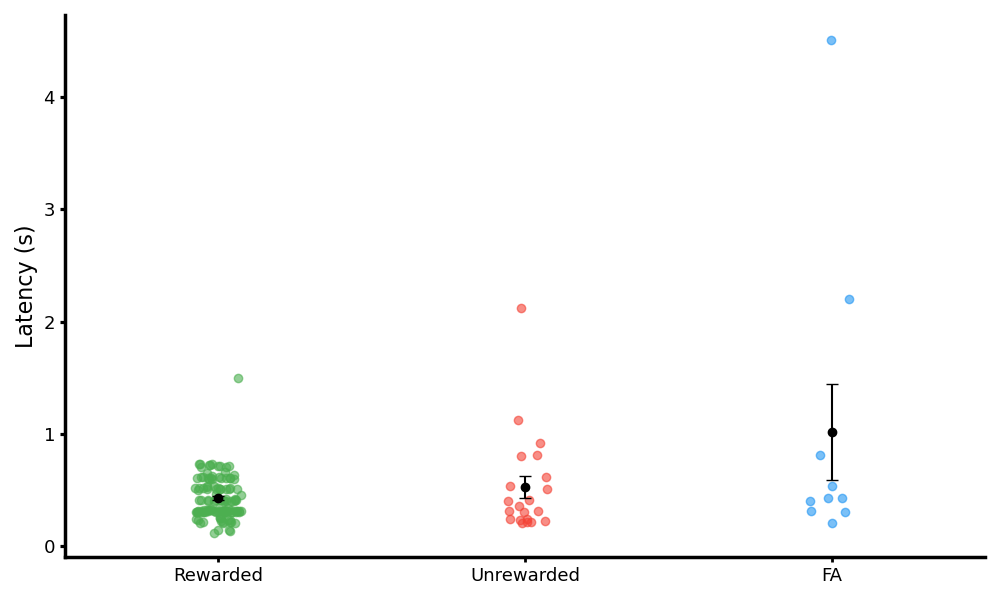

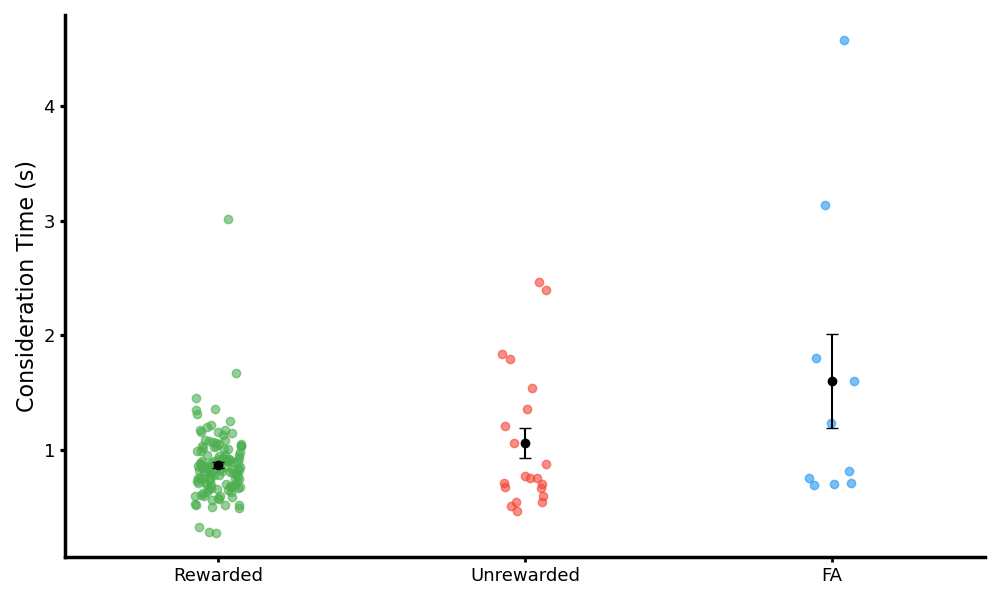

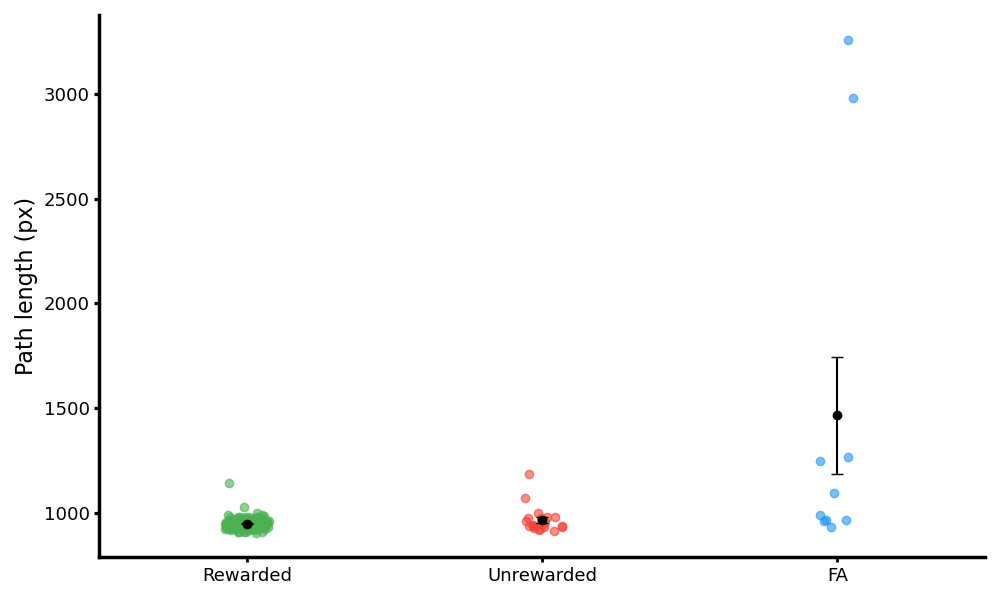

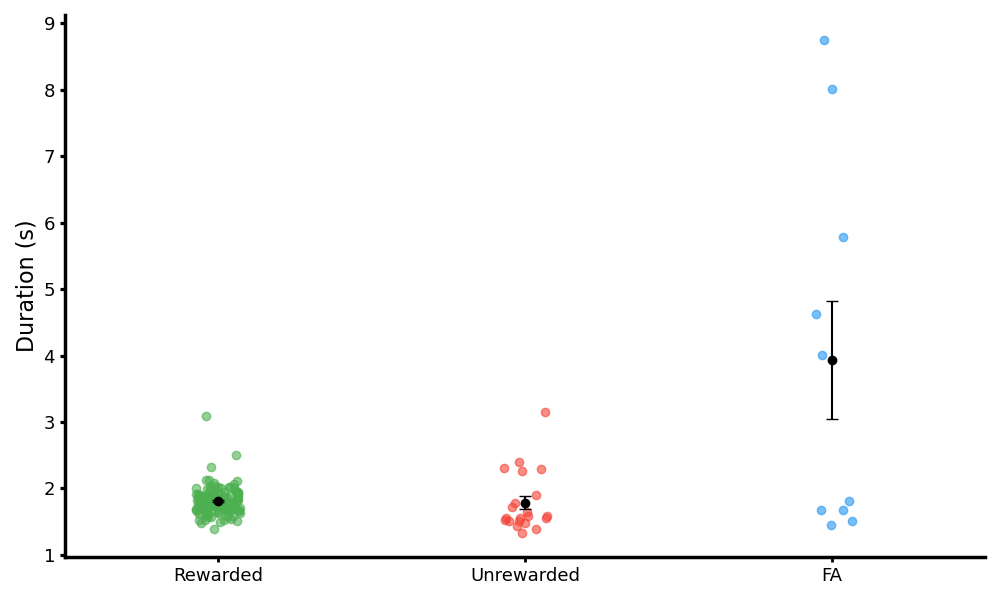

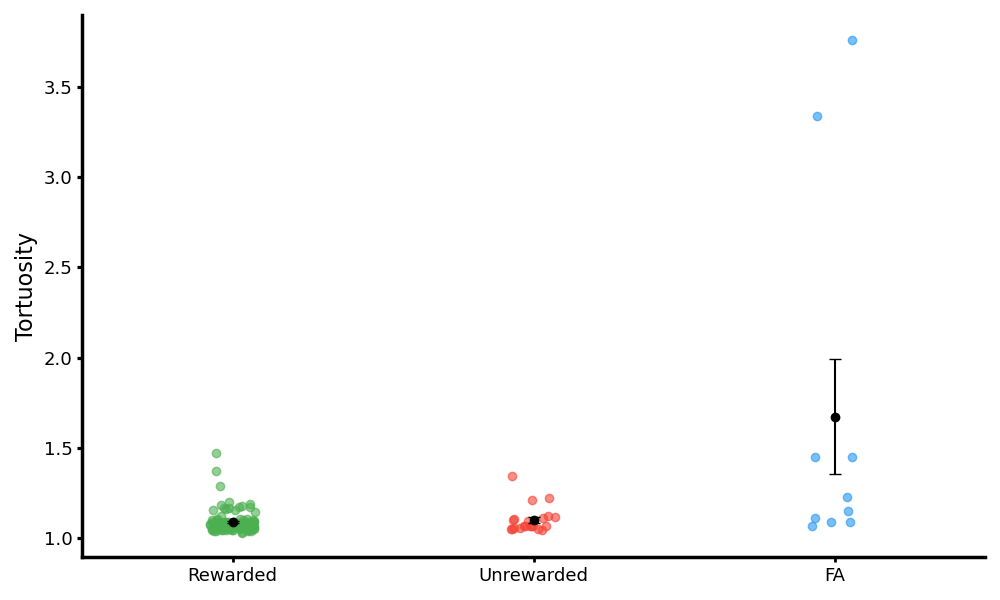

In [5]:
onset_latency = plot_movement_analysis_statistics(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    clean_graph=False
)

# Functionalities

In [9]:
plt.close('all')

In [13]:
print_cache_keys()

[CACHE CONTENTS] Current cache keys:
  (40, '20251211', 'sleap_session')
  (40, '20251211', 'speed_analysis')
  (40, '20251231', 'sleap_session')
  (40, '20251231', 'speed_analysis')


# Miscellaneous

In [ ]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows), or trial_windows_rew
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(40, 20251211, mode='time_windows', time_windows=[("14:42:12", "14:42:55")],trial_windows=[(0, 10), (-10,None)], xlim=(100,1160), ylim=(10,950))